## SPAM FILTER PROJECT

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Text Preprocessing

In [3]:
df = pd.read_csv('SMSSpamCollection.csv', sep='\t')

In [4]:
df.columns = ['Label','Message']

In [5]:
df.head()

,Label,Message
0,ham,Ok lar... Joking wif u oni...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,U dun say so early hor... U c already then say...
3,ham,"Nah I don't think he goes to usf, he lives aro..."
4,spam,FreeMsg Hey there darling it's been 3 week's n...


In [6]:
print (df.shape)

(5571, 2)


In [7]:
df.describe()

,Label,Message
count,5571,5571
unique,2,5168
top,ham,"Sorry, I'll call later"
freq,4824,30


In [8]:
#Find out the number of ham and spam
df.Label.value_counts()

ham     4824
spam     747
Name: Label, dtype: int64

Dataframe contains two unique labels which are the 'ham' and 'spam'. The most frequent ham message was 'Sorry, I'll call later and it appeared 30 times.<br><br>
It is however obvious that our classes are not balanced with ham messages occuring much frequently

In [9]:
df.isnull().sum()

Label      0
Message    0
dtype: int64

### Normalize Text

In [10]:
import string 

In [11]:
## Remove puntuations 

def clean_message(message):
    message = [char for char in message if char not in string.punctuation]
    message = ''.join(message)
    
    return message
df.Message = df.Message.apply(clean_message)

In [12]:
## Change all characters to lower case 

def lower_case(message):
    message = message.lower()
    
    return message

df.Message = df.Message.apply(lower_case)

In [13]:
from nltk import WordPunctTokenizer
from nltk.corpus import stopwords

In [14]:
stop_word_list = stopwords.words('english')

In [15]:
##Tokenize document

def tokenize_message(message):
    
    tokenize = WordPunctTokenizer()
    message_tokens = tokenize.tokenize(message)
    
    return message_tokens

df.Message = df.Message.apply(tokenize_message)

In [16]:
#Remove stopwords

def rem_stopwords(message):
    
    stop_words = stopwords.words('english')
    
    message = [word for word in message if word not in stop_words]
    
    return message

df.Message = df.Message.apply(rem_stopwords)

In [17]:
df.Message

0                          [ok, lar, joking, wif, u, oni]
1       [free, entry, 2, wkly, comp, win, fa, cup, fin...
2           [u, dun, say, early, hor, u, c, already, say]
3       [nah, dont, think, goes, usf, lives, around, t...
4       [freemsg, hey, darling, 3, weeks, word, back, ...
                              ...                        
5566    [2nd, time, tried, 2, contact, u, u, £, 750, p...
5567                   [ü, b, going, esplanade, fr, home]
5568                     [pity, mood, soany, suggestions]
5569    [guy, bitching, acted, like, id, interested, b...
5570                                   [rofl, true, name]
Name: Message, Length: 5571, dtype: object

In [18]:
df.shape

(5571, 2)

In [19]:
from nltk.stem import WordNetLemmatizer

In [20]:
df['Length'] = df['Message'].apply(len)

In [21]:
df.head()

,Label,Message,Length
0,ham,"[ok, lar, joking, wif, u, oni]",6
1,spam,"[free, entry, 2, wkly, comp, win, fa, cup, fin...",23
2,ham,"[u, dun, say, early, hor, u, c, already, say]",9
3,ham,"[nah, dont, think, goes, usf, lives, around, t...",8
4,spam,"[freemsg, hey, darling, 3, weeks, word, back, ...",20


### Exploratory Data Analysis

In [22]:
df.groupby(['Label'])['Length'].describe()

,count,mean,std,min,25%,50%,75%,max
Label,,,,,,,,
ham,4824.0,8.333333,6.613246,0.0,4.0,6.0,11.0,80.0
spam,747.0,17.266399,4.868235,2.0,15.0,18.0,21.0,29.0


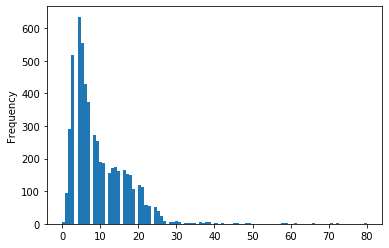

In [23]:
df.Length.plot.hist( bins = 100)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002694A3097C8>,
      dtype=object)

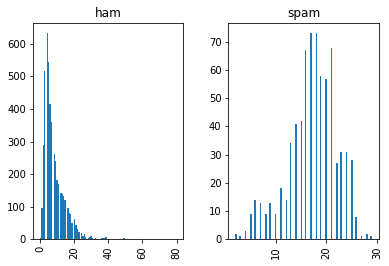

In [24]:
df.hist(column='Length',by='Label',bins=100)

Spam messages seem to havea longer length than ham messages

In [25]:
#Get Bag of words
from sklearn.feature_extraction.text import CountVectorizer

In [26]:
bow = CountVectorizer(analyzer =rem_stopwords).fit_transform(df.Message)

In [27]:
print('Shape of sparse matrix is : ', bow.shape)

Shape of sparse matrix is :  (5571, 9458)


In [28]:
from sklearn.feature_extraction.text import TfidfTransformer

In [29]:
bow_tfidf_transformer = TfidfTransformer().fit(bow)

In [30]:
bow_tfidf_transformed = bow_tfidf_transformer.transform(bow)

### Train - Test Split

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
label_map ={'ham':1,'spam':0}

In [33]:
df.Label = df.Label.map(label_map)

In [34]:
df.Label

0       1
1       0
2       1
3       1
4       0
       ..
5566    0
5567    1
5568    1
5569    1
5570    1
Name: Label, Length: 5571, dtype: int64

In [35]:
X_train, X_test, y_train, y_test = train_test_split(bow_tfidf_transformed,df.Label, train_size = 0.75, random_state=10)

### Modeling

### Binary Logistic Model

In [36]:
from sklearn.linear_model import LogisticRegression 

In [37]:
reg_model = LogisticRegression()

In [38]:
reg_model.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [39]:
pred_labels = reg_model.predict(X_test)

In [40]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [41]:
confusion_matrix(pred_labels, y_test)

array([[ 116,    2],
       [  69, 1206]], dtype=int64)

In [42]:
accuracy_score(pred_labels, y_test)

0.9490308686288585

In [43]:
print(classification_report(pred_labels, y_test))

              precision    recall  f1-score   support

           0       0.63      0.98      0.77       118
           1       1.00      0.95      0.97      1275

    accuracy                           0.95      1393
   macro avg       0.81      0.96      0.87      1393
weighted avg       0.97      0.95      0.95      1393



### Multinomial Naiye Bayes Model 

In [44]:
from sklearn.naive_bayes import MultinomialNB

In [45]:
nvb_model = MultinomialNB()

In [46]:
nvb_model.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [47]:
nvb_predictions = nvb_model.predict(X_test)

In [48]:
confusion_matrix(nvb_predictions, y_test)

array([[ 123,    0],
       [  62, 1208]], dtype=int64)

In [49]:
print(classification_report(nvb_predictions, y_test))

              precision    recall  f1-score   support

           0       0.66      1.00      0.80       123
           1       1.00      0.95      0.97      1270

    accuracy                           0.96      1393
   macro avg       0.83      0.98      0.89      1393
weighted avg       0.97      0.96      0.96      1393



In [50]:
accuracy_score(nvb_predictions, y_test)

0.955491744436468